In [1]:
# 文本通常只是数据集中的字符串，但并非所有字符串特征都应该被当做文本来处理，常见四种类型
# 分类数据、可以在语义上映射为类别的自由字符串、结构化字符串数据、文本数据
# 在文本分析的语境中，数据集通常被称为语料库，每个由单个文本表示的数据点被称为文档

In [66]:
# 示例应用：电影评论的情感分析
# 使用aclimdb数据集，数据集包含评论文本，及一个标签用于表示该评论是“正面的”还是“负面的”
from sklearn.datasets import load_files

# load_files返回一个Bunch对象，其中包含训练文本和训练标签
reviews_train = load_files("./data/aclimdb/train/")
text_trian, y_train = reviews_train.data, reviews_train.target
print("tpye of text_train:{}".format(type(text_trian)))
print("length of text_train:{}".format(len(text_trian)))
print("text_train[1]:\n{}".format(text_trian[1]))

tpye of text_train:<class 'list'>
length of text_train:75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, s

In [67]:
# 清洗文本中存在的HTML换行符
text_trian = [doc.replace(b"<br />", b" ") for doc in text_trian]

In [68]:
# 过滤掉标签为2的数据
def filter_data(X, y):
    df = pd.DataFrame({'data': text_trian,
                          'class': y_train})
    df_new = df[df['class']!=2]
    return df_new['data'], df_new['class']

In [69]:
text_trian, y_train = filter_data(text_trian, y_train)

In [70]:
# 加载测试数据
reviews_test = load_files("./data/aclimdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [71]:
# 文本数据并不是机器学习可以处理的格式，我们需要将文本的字符串表示转换为数值表示

In [72]:
# 将文本数据表示为词袋 是用于机器学习的文本表示的一种最简单也是最有效且常用的方法
# 使用这种表示时我们舍弃文本的机构，只计算语料库中每个单词在每个文本中出现的频次
# 对于文档语料库，计算词袋表示包括以下三个步骤：
# ①分词：将每个文档划分为出现在其中的单词(成为词例)，比如按空格和标点划分
# ②构建词表：收集一个词表，里面包含出现在任意文档中的所有词，并进行编号(比如按字母排序)
# ③编码：对于每个文档，计算词表中每个单词在该文档中出现的频次

In [73]:
# 词袋表示是在CountVectorizer中实现，它是一个转换器(transfromer)
from sklearn.feature_extraction.text import CountVectorizer

bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]
vect = CountVectorizer()
vect.fit(bards_words)
# 可通过vocabulary_属性来访问词表
print("Vocabulary size:{}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

Vocabulary size:13
Vocabulary content:
{'fool': 3, 'wise': 12, 'himself': 5, 'but': 1, 'doth': 2, 'man': 8, 'is': 6, 'to': 11, 'think': 10, 'knows': 7, 'the': 9, 'be': 0, 'he': 4}


In [74]:
# 创建训练数据的词袋表示
bag_of_words = vect.transform(bards_words)
print("bag_of_words:{}".format(repr(bag_of_words)))

bag_of_words:<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [75]:
# 词袋表示保存在一个Scipy稀疏矩阵中，这种格式只保存非零元素，每个特征对应词表中一个单词
# 查看稀疏矩阵的实际内容，可使用toarray方法将其转换为“密集的”NumPy数组(保存所有0元素)
# 但是对于真实数据将会导致MemoryError(内存错误)
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [76]:
# 将词袋应用于电影评论数据
vect = CountVectorizer().fit(text_trian)
X_train = vect.transform(text_trian)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [78]:
# 访问词表的还可使用向量器的get_feature_name方法它将返回一个列表,每个元素对应一个特征
feature_names = vect.get_feature_names()
print("Number of features:{}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features:74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [81]:
# 尝试在未改进特征提取的数据上进行分类训练，对高维稀疏数据，类似逻辑回归的线性模型效果好
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, 
                                                cv=5)
print("Mean cross-validation accuracy:{:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy:0.88


In [82]:
# 尝试使用网格搜索交叉验证来调节正则化参数C
from sklearn.model_selection import GridSearchCV

parm_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
            'max_iter':[1000]}
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Besr parameters:", grid.best_params_)

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89
Besr parameters: {'C': 0.1, 'max_iter': 1000}


In [84]:
# 在测试集上评估
X_test = vect.transform(text_test)
print("Test-set score:{:.2f}".format(grid.score(X_test, y_test)))

Test-set score:0.88


In [85]:
# 尝试改进单次提取
# CountVectorizer使用正则表达式提取词例，默认使用的正则表达式是“\b\w\w+\b”，然后会
# 将所有的单词转换为小写字母；前面我们还得到了许多不包含任何信息量的特征(比如数字),
# 减少这些特征的一种方法就是设置仅使用至少在n个文档中出现过的词例

In [87]:
# min_df参数设置词例至少出现次数
vect = CountVectorizer(min_df=5).fit(text_trian)
X_train = vect.transform(text_trian)
print("X_train with min_df:{}".format(repr(X_train)))

X_train with min_df:<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [88]:
feature_names = vect.get_feature_names()
print("First 50 feature:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 feature:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciatio

In [89]:
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))
print("Besr parameters:", grid.best_params_)

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89
Besr parameters: {'C': 0.1, 'max_iter': 1000}


In [90]:
# 虽然网格搜索最佳验证的精度没有提升，但减少要处理的特征数量可以加速处理过程
# 舍弃无用特征也可能提高模型的可解释性

In [91]:
# 停用词 删除没有信息量的单词还有另一种方法，就是舍弃那些出现次数太多以至于没有信息量的
# 单词，有两种主要方法：使用特定语言的停用词列表，或者舍弃那些出现过于频繁的单词

In [94]:
# scikit-learn的feature_extraction.text模块中提供了英语停用词的内置列表
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of step words:{}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of step words:318
Every 10th stopword:
['interest', 're', 'me', 'ie', 'who', 'seems', 'hereby', 'few', 'put', 'seemed', 'we', 'where', 'because', 'alone', 'among', 'whose', 'around', 'than', 'take', 'bill', 'thus', 'though', 'well', 'top', 'show', 'whereby', 'eg', 'herein', 'else', 'down', 'namely', 'somewhere']


In [97]:
# 指定stop_words="english"将使用内置列表，我们也可以扩展这个列表并传入我们自己的列表
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_test)
X_train = vect.transform(text_trian)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26445 sparse matrix of type '<class 'numpy.int64'>'
	with 2120667 stored elements in Compressed Sparse Row format>


In [98]:
# 特征数量比前面减少了305个，说明大部分停用词都出现了
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

Best cross-validation score:0.88


In [106]:
# 使用停用词后的网格搜索性能略有下降，但鉴于从27000多个特征中删除305个不太可能对性能
# 和解释性造成很大影响，所以使用这个列表似乎是不值得，固定列表主要对小型数据集很有帮助，
# 这些数据集可能没有包含足够的信息，模型从数据本身无法判断哪些单词是停用词
# 可以尝试另一种方法，通过设置max_df参数来舍弃高频单词
vect = CountVectorizer(min_df=5, max_df=10000).fit(text_test)
X_train = vect.transform(text_trian)
print("X_train with stop words:\n{}".format(repr(X_train)))
grid = GridSearchCV(LogisticRegression(), parm_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

X_train with stop words:
<25000x26709 sparse matrix of type '<class 'numpy.int64'>'
	with 2711464 stored elements in Compressed Sparse Row format>
Best cross-validation score:0.89


In [107]:
# 词频-逆文档频率(tf-idf) 是一种按照我们预计的信息量大小老缩放特征，而不是舍弃那些认为
# 不重要的特征，这一方法对某个特定文档中将常出现的术语给予很高的权重，但对在语料库中的
# 许多文档中都经常出现的术语给予的权重却不高
# scikit-learn在两个类中实现了tf-idf方法：TfidfTransformer和TfidfVectorizer
# TfidfTransfromer接受CountVectorizer生成的稀疏矩阵并将其变换
# TfidfVectorizer接受文本数据并完成词袋特征提取与tf-idf变换
# 单词w在文档d中的tf-idf分数计算公式：tfinf(w,d) = tf log ((N+1) / (Nw+1)) + 1
# 其中N是训练集中的文档数量，Nw是训练集中出现单词w的文档数量，tf(词频)是单词w在文档d中
# 出现的次数，这两个类在完成tf-idf表示后还应用了L2范数进行缩放

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_trian, y_train)
print("Best cross-validation score:{:.2f}".format(grid.best_score_))

d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

Best cross-validation score:0.89


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
# 我们可以查看tf-idf找到的最重要的单词，tf-idf缩放的目的是找到能够区分文档的单词，但是
# 它完全是一种无监督技术，因此这里的“重要”不一定与分类结果标签相关
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_trian)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(
                feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf:\n{}".format(
                feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [122]:
# 我们还可以查看找到的逆行文档频率较低的单词，即出现次数很多，但被认为不那么重要的单词
# 逆文档频率值被保存在idf_属性中
sorted_by_tfidf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
            feature_names[sorted_by_tfidf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


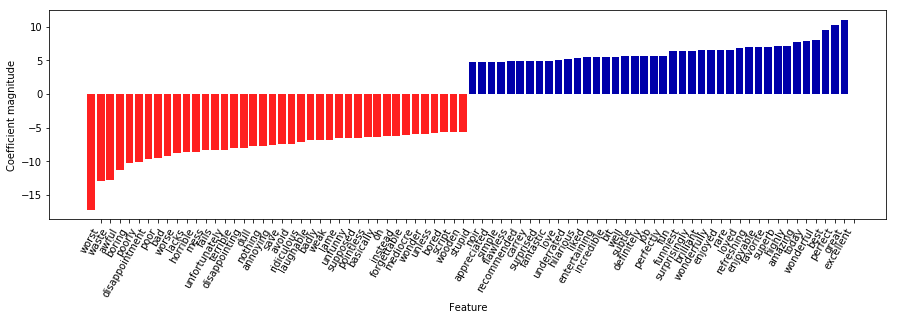

In [126]:
# 研究模型系数  
# 查看逻辑回归模型中最大的25个系数与最小的25个系数，左侧的负系数属于模型找到的表示
# 负面评论的单词，右侧的正系数属于模型找到的表示正面评价的单词
import mglearn

mglearn.tools.visualize_coefficients(
        grid.best_estimator_.named_steps["logisticregression"].coef_,
        feature_names, n_top_features=40)